# Data Processing

###### 

## Importing Main Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###### 

## Importing Dataset

In [2]:
df = pd.read_csv("email_3000/Datasets/final_dataset.csv")

In [3]:
df.head()

Email   Label  Length
0   I am the wife of Mr. Nicolai Sainovic one of ...   FRAUD    1752
1   save your money by getting an oem software ! ...    SPAM     158
2   in financial planning time is your friend  we...    SPAM     929
3   request submitted : access request for amitav...  NORMAL     421
4   contstraints on the shape of a smile  stinson...  NORMAL     754

In [4]:
df=df[['Email', 'Label']]
df.columns=['email', 'result']
df['result']=df['result'].str.replace('NORMAL', '0')
df['result']=df['result'].str.replace('SPAM', '1')
df['result']=df['result'].str.replace('FRAUD', '1')
df=df.astype({'email':'string', 'result':int})
df=df.dropna()
df=df.drop_duplicates()

In [5]:
df['email'][1]

' save your money by getting an oem software !  need in software for your pc ? just visit our site , we might have what you need . . .  best regards ,  fallon '

In [6]:
df=df[['email', 'result']]

In [7]:
df.head()

email  result
0   I am the wife of Mr. Nicolai Sainovic one of ...       1
1   save your money by getting an oem software ! ...       1
2   in financial planning time is your friend  we...       1
3   request submitted : access request for amitav...       0
4   contstraints on the shape of a smile  stinson...       0

In [8]:
df.result.value_counts()

1    2000
0    1000
Name: result, dtype: int64

In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
x=df[df['result']==0]
y=df[df['result']==1]

In [12]:
mails=df['email'].copy()

In [13]:
mails

0        I am the wife of Mr. Nicolai Sainovic one of ...
1        save your money by getting an oem software ! ...
2        in financial planning time is your friend  we...
3        request submitted : access request for amitav...
4        contstraints on the shape of a smile  stinson...
                              ...                        
2995     understanding and applying financial mathemat...
2996     you don _ t know how to attract customers to ...
2997      Permit me to inform you of my desir= e of go...
2998     need to find something ?  to be removed from ...
2999     adv oil and gas investment tgym  how would yo...
Name: email, Length: 3000, dtype: string

In [14]:
type(mails)

pandas.core.series.Series

###### 

## Converting to LowerCase

In [15]:
lower_mails = [mail.lower() for mail in mails]
lower_mails

[' i am the wife of mr. nicolai sainovic one of the  people of the former yugoslavia indicted at the war  crime tribunal in hague.the indictment was politically  motivated we must say, but there is nothing we can do  now but to answer according to the law.the whole  set-up we believe was a package some of the the  western world has provided former yugoslavia to  contend with. mr. slobodan milutinovic and my husband  had kept some funds, american currencies in a private  bank to enable them take care of rebel problems.   however, now that the country they seeked to protect  has turned against them,we need to transfer the money  out for safety from where it has been lodged somewhere  in europe.the fund is in excess of { 200 million dollars}two hundred  million dollars).  it can be transferred to you under diplomatic immunity  or be paid into offshore accounts through which you  will lay possession of it to foster some investment on  our behalf.can you handle this projects? are you  capab

## Removing Stop-Words

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print(ENGLISH_STOP_WORDS)

frozenset({'to', 'interest', 'how', 'take', 'through', 'into', 'from', 'above', 're', 'we', 'thence', 'during', 'anyway', 'full', 'against', 'empty', 'have', 'has', 'whose', 'eleven', 'could', 'some', 'were', 'etc', 'whereafter', 'hence', 'less', 'until', 'on', 'another', 'whereby', 'any', 'else', 'her', 'hereafter', 'however', 'five', 'hereupon', 'mostly', 'therein', 'cannot', 'your', 'here', 'never', 'ours', 'than', 'for', 'each', 'anywhere', 'very', 'whereas', 'everyone', 'throughout', 'under', 'himself', 'would', 'out', 'although', 'ltd', 'seems', 'beyond', 'ever', 'me', 'due', 'both', 'put', 'thru', 'per', 'which', 'elsewhere', 'first', 'what', 'whom', 'anyone', 'besides', 'amongst', 'give', 'of', 'his', 'becomes', 'afterwards', 'everything', 'nobody', 'further', 'one', 'most', 'often', 'fifty', 'nine', 'though', 'thereafter', 'mill', 'sixty', 'their', 'she', 'within', 'go', 'detail', 'our', 'four', 'keep', 'might', 'yourselves', 'much', 'latterly', 'was', 'alone', 'latter', 'sinc

In [17]:
no_stop_mails = [" ".join([word for word in mail.split() if word not in ENGLISH_STOP_WORDS]) for mail in lower_mails]
no_stop_mails

['wife mr. nicolai sainovic people yugoslavia indicted war crime tribunal hague.the indictment politically motivated say, answer according law.the set-up believe package western world provided yugoslavia contend with. mr. slobodan milutinovic husband kept funds, american currencies private bank enable care rebel problems. however, country seeked protect turned them,we need transfer money safety lodged europe.the fund excess { 200 million dollars}two million dollars). transferred diplomatic immunity paid offshore accounts lay possession foster investment behalf.can handle projects? capable handling funds? trustworthy? asked offer 30%,for assistance, ok you?please reply earliest enable stop contacting persons assistance. home office address phone & fax number company position international passport driver linces information vital success transaction.note transaction risk free. commence immediately secure legal documents favor acceptance fully co-operate me. await urgent response enable j

## Removing Numbers

In [18]:
no_num_mails = [" ".join([word for word in mail.split() if not word.isnumeric()]) for mail in no_stop_mails]

## Expanding Contractions

In [19]:
import contractions
contractions.contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [20]:
contract_mail = [" ".join([contractions.fix(word) for word in mail.split()]) for mail in no_num_mails]
contract_mail

['wife mr. nicolai sainovic people yugoslavia indicted war crime tribunal hague.the indictment politically motivated say, answer according law.the set-up believe package western world provided yugoslavia contend with. mr. slobodan milutinovic husband kept funds, american currencies private bank enable care rebel problems. however, country seeked protect turned them,we need transfer money safety lodged europe.the fund excess { million dollars}two million dollars). transferred diplomatic immunity paid offshore accounts lay possession foster investment behalf.can handle projects? capable handling funds? trustworthy? asked offer 30%,for assistance, ok you?please reply earliest enable stop contacting persons assistance. home office address phone & fax number company position international passport driver linces information vital success transaction.note transaction risk free. commence immediately secure legal documents favor acceptance fully co-operate me. await urgent response enable jump-

## Removing Punctuations

In [21]:
import string

In [22]:
no_punct_mails = [mail.translate(str.maketrans('', '', string.punctuation)) for mail in contract_mail]
no_punct_mails

['wife mr nicolai sainovic people yugoslavia indicted war crime tribunal haguethe indictment politically motivated say answer according lawthe setup believe package western world provided yugoslavia contend with mr slobodan milutinovic husband kept funds american currencies private bank enable care rebel problems however country seeked protect turned themwe need transfer money safety lodged europethe fund excess  million dollarstwo million dollars transferred diplomatic immunity paid offshore accounts lay possession foster investment behalfcan handle projects capable handling funds trustworthy asked offer 30for assistance ok youplease reply earliest enable stop contacting persons assistance home office address phone  fax number company position international passport driver linces information vital success transactionnote transaction risk free commence immediately secure legal documents favor acceptance fully cooperate me await urgent response enable jumpstart project nurture realitypl

## Lemmatization

In [23]:
# from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [24]:
# stemmer = PorterStemmer()
# stem_mails = [" ".join([stemmer.stem(word) for word in mail.split()]) for mail in mails]


In [25]:
lemmatizer = WordNetLemmatizer()
lem_mails_adj = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ) for word in mail.split()]) for mail in no_punct_mails]
lem_mails_adjsat = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ_SAT) for word in mail.split()]) for mail in lem_mails_adj]
lem_mails_adv = [" ".join([lemmatizer.lemmatize(word, wordnet.ADV) for word in mail.split()]) for mail in lem_mails_adjsat]
lem_mails_noun = [" ".join([lemmatizer.lemmatize(word, wordnet.NOUN) for word in mail.split()]) for mail in lem_mails_adv]
lem_mails_verb = [" ".join([lemmatizer.lemmatize(word, wordnet.VERB) for word in mail.split()]) for mail in lem_mails_noun]
lem_mails = lem_mails_verb

In [26]:
# stem_mails

In [27]:
lem_mails

['wife mr nicolai sainovic people yugoslavia indict war crime tribunal haguethe indictment politically motivate say answer accord lawthe setup believe package western world provide yugoslavia contend with mr slobodan milutinovic husband keep fund american currency private bank enable care rebel problem however country seek protect turn themwe need transfer money safety lodge europethe fund excess million dollarstwo million dollar transfer diplomatic immunity pay offshore account lay possession foster investment behalfcan handle project capable handle fund trustworthy ask offer 30for assistance ok youplease reply early enable stop contact person assistance home office address phone fax number company position international passport driver linces information vital success transactionnote transaction risk free commence immediately secure legal document favor acceptance fully cooperate me await urgent response enable jumpstart project nurture realityplease kindly reply personal email sussa

In [28]:
lem_mails[1]

'save money get oem software need software pc just visit site need best regard fallon'

## Vectorization

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer()
spam_mails = [lem_mails[i] for i in list(df[df['result']==1].index)]
vectorizer.fit(spam_mails)
spam_word_dict = vectorizer.vocabulary_

In [31]:
print(len(spam_word_dict))

23880


In [32]:
spam_word_dict

{'wife': 23220,
 'mr': 14454,
 'nicolai': 15117,
 'sainovic': 18803,
 'people': 16467,
 'yugoslavia': 23773,
 'indict': 11388,
 'war': 22982,
 'crime': 6197,
 'tribunal': 21586,
 'haguethe': 10242,
 'indictment': 11389,
 'politically': 16883,
 'motivate': 14413,
 'say': 18921,
 'answer': 2531,
 'accord': 1560,
 'lawthe': 12755,
 'setup': 19287,
 'believe': 3595,
 'package': 16176,
 'western': 23144,
 'world': 23398,
 'provide': 17450,
 'contend': 5794,
 'with': 23315,
 'slobodan': 19670,
 'milutinovic': 14076,
 'husband': 10939,
 'keep': 12375,
 'fund': 9599,
 'american': 2348,
 'currency': 6277,
 'private': 17221,
 'bank': 3334,
 'enable': 8118,
 'care': 4482,
 'rebel': 17836,
 'problem': 17258,
 'however': 10779,
 'country': 6038,
 'seek': 19096,
 'protect': 17431,
 'turn': 21701,
 'themwe': 20934,
 'need': 14953,
 'transfer': 21481,
 'money': 14267,
 'safety': 18790,
 'lodge': 13141,
 'europethe': 8470,
 'excess': 8547,
 'million': 14041,
 'dollarstwo': 7364,
 'dollar': 7289,
 'dipl

In [33]:
sorted_spam_words=sorted(spam_word_dict, key=spam_word_dict.get, reverse=True)
sorted_spam_words

['õ3397',
 'õ114',
 'zzzz',
 'zzn',
 'zymg',
 'zygoma',
 'zyed2c',
 'zyban',
 'zxghlajf',
 'zwzm',
 'zwischen',
 'zuyw',
 'zustellstatus',
 'zungenakrobatik',
 'zunf',
 'zuma2c',
 'zuma',
 'zum',
 'zulu2c',
 'zulu',
 'zuka2004excitecom',
 'zuid',
 'zuba',
 'ztvwo',
 'zt',
 'zoraidaguerra',
 'zoolant',
 'zoo',
 'zongothe',
 'zongo',
 'zong',
 'zone2e',
 'zone',
 'zoloftpain',
 'zndnioays',
 'znalazlam',
 'zmsx',
 'zmail',
 'zkcc',
 'ziya',
 'zipmail',
 'zip',
 'zincmanganese',
 'zimmy',
 'zimmerman',
 'zimbabwemy',
 'zimbabwei',
 'zimbabwebut',
 'zimbabweat',
 'zimbabwean',
 'zimbabwe2ethis',
 'zimbabwe2eduring',
 'zimbabwe2e',
 'zimbabwe2c',
 'zimbabwe20',
 'zimbabwe',
 'zig',
 'zhongxun',
 'zhongwen',
 'zhi',
 'zheng',
 'zhanghe1967163com',
 'zhang',
 'zgc',
 'zex',
 'zerobased',
 'zero',
 'zenon',
 'zenith',
 'zenab',
 'zen',
 'zelma',
 'zeid',
 'zedo',
 'zedex',
 'zealand',
 'zeal',
 'ze',
 'zbb',
 'zaunpe',
 'zanupf',
 'zambian',
 'zambia2e',
 'zamba',
 'zamani2c',
 'zaki',
 'zakha

In [34]:
d={'like': 5, 'to': 6, 'eat': 3, 'apple': 1, 'and': 0, 'drink': 2, 'juice': 4}
sorted(d, key=d.get)

['and', 'apple', 'drink', 'eat', 'juice', 'like', 'to']

In [35]:
spam_word_dict['zndnioays']

23845

In [36]:
data_dict={key:[] for key in sorted_spam_words}
data_dict

{'õ3397': [],
 'õ114': [],
 'zzzz': [],
 'zzn': [],
 'zymg': [],
 'zygoma': [],
 'zyed2c': [],
 'zyban': [],
 'zxghlajf': [],
 'zwzm': [],
 'zwischen': [],
 'zuyw': [],
 'zustellstatus': [],
 'zungenakrobatik': [],
 'zunf': [],
 'zuma2c': [],
 'zuma': [],
 'zum': [],
 'zulu2c': [],
 'zulu': [],
 'zuka2004excitecom': [],
 'zuid': [],
 'zuba': [],
 'ztvwo': [],
 'zt': [],
 'zoraidaguerra': [],
 'zoolant': [],
 'zoo': [],
 'zongothe': [],
 'zongo': [],
 'zong': [],
 'zone2e': [],
 'zone': [],
 'zoloftpain': [],
 'zndnioays': [],
 'znalazlam': [],
 'zmsx': [],
 'zmail': [],
 'zkcc': [],
 'ziya': [],
 'zipmail': [],
 'zip': [],
 'zincmanganese': [],
 'zimmy': [],
 'zimmerman': [],
 'zimbabwemy': [],
 'zimbabwei': [],
 'zimbabwebut': [],
 'zimbabweat': [],
 'zimbabwean': [],
 'zimbabwe2ethis': [],
 'zimbabwe2eduring': [],
 'zimbabwe2e': [],
 'zimbabwe2c': [],
 'zimbabwe20': [],
 'zimbabwe': [],
 'zig': [],
 'zhongxun': [],
 'zhongwen': [],
 'zhi': [],
 'zheng': [],
 'zhanghe1967163com': [],


In [37]:
vectorizer2 = TfidfVectorizer()
for mail in lem_mails:
    vectorizer2.fit([mail])
    word_count_dict = vectorizer2.vocabulary_
    for spam_word in data_dict:
        if spam_word in word_count_dict:
            data_dict[spam_word].append(word_count_dict[spam_word])
        else:
            data_dict[spam_word].append(0)

In [38]:
for spam_word in data_dict:
        if spam_word in word_count_dict:
            print(data_dict[spam_word])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
data_dict['zymg']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [41]:
data_dict.update({'result':df['result'].tolist()})

In [42]:
data_dict.keys()

dict_keys(['õ3397', 'õ114', 'zzzz', 'zzn', 'zymg', 'zygoma', 'zyed2c', 'zyban', 'zxghlajf', 'zwzm', 'zwischen', 'zuyw', 'zustellstatus', 'zungenakrobatik', 'zunf', 'zuma2c', 'zuma', 'zum', 'zulu2c', 'zulu', 'zuka2004excitecom', 'zuid', 'zuba', 'ztvwo', 'zt', 'zoraidaguerra', 'zoolant', 'zoo', 'zongothe', 'zongo', 'zong', 'zone2e', 'zone', 'zoloftpain', 'zndnioays', 'znalazlam', 'zmsx', 'zmail', 'zkcc', 'ziya', 'zipmail', 'zip', 'zincmanganese', 'zimmy', 'zimmerman', 'zimbabwemy', 'zimbabwei', 'zimbabwebut', 'zimbabweat', 'zimbabwean', 'zimbabwe2ethis', 'zimbabwe2eduring', 'zimbabwe2e', 'zimbabwe2c', 'zimbabwe20', 'zimbabwe', 'zig', 'zhongxun', 'zhongwen', 'zhi', 'zheng', 'zhanghe1967163com', 'zhang', 'zgc', 'zex', 'zerobased', 'zero', 'zenon', 'zenith', 'zenab', 'zen', 'zelma', 'zeid', 'zedo', 'zedex', 'zealand', 'zeal', 'ze', 'zbb', 'zaunpe', 'zanupf', 'zambian', 'zambia2e', 'zamba', 'zamani2c', 'zaki', 'zakharenko', 'zaire3f', 'zaire292e', 'zaire', 'zainteresuje', 'zainoul', 'zai', '

In [43]:
len(data_dict)

23880

## DataFrame Creation

In [129]:
df2=pd.DataFrame(data_dict, columns=data_dict.keys())

In [99]:
# Saving dataframe
df2.to_csv("data.csv", index=False)

###### 

## Model Creation

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [130]:
x=df2.drop(columns=['result'])
y=df2['result']

In [131]:
sampler=RandomUnderSampler()
x, y = sampler.fit_resample(x, y)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [76]:
model = MLPClassifier()

In [77]:
model.fit(x_train, y_train)

MLPClassifier()

###### 

## Prediction and Determining Accuracy

In [78]:
predictions = model.predict(x_test)

In [79]:
score = accuracy_score(y_test, predictions)
score

0.9683333333333334

In [87]:
model.classes_

array([0, 1], dtype=int64)

In [85]:
model.best_loss_

0.0023487823482860877

In [88]:
model.coefs_

[array([[-6.36607670e-03,  4.06202915e-09, -2.62018027e-09, ...,
         -1.27263726e-08,  2.15045331e-10,  7.45712635e-03],
        [-1.00104958e-02, -2.36917748e-09,  9.76089674e-13, ...,
          3.53963280e-09,  2.92839754e-09,  4.49350772e-03],
        [-1.77495866e-08,  2.26161198e-02, -1.05650972e-02, ...,
          7.22109539e-06,  2.62098932e-02,  2.37097759e-03],
        ...,
        [ 9.49972586e-11, -7.48695538e-10, -1.83897795e-09, ...,
         -1.08859976e-09, -4.45223519e-11, -6.15191495e-10],
        [ 1.01003610e-09,  6.41255006e-10, -5.07093082e-11, ...,
         -9.58605830e-09, -4.68606429e-11, -4.31785295e-11],
        [ 2.56884163e-11,  1.08056063e-08,  9.80842702e-09, ...,
          1.10348394e-10,  8.72216905e-11,  1.45755779e-11]]),
 array([[-0.03351269],
        [ 0.17317994],
        [-0.03858089],
        [ 0.24328158],
        [ 0.01962564],
        [ 0.21472403],
        [-0.20428455],
        [ 0.22336154],
        [ 0.06146148],
        [-0.04531352],

In [89]:
model.intercepts_

[array([0.08265482, 0.04028512, 0.08414811, 0.05874561, 0.04903026,
        0.09052698, 0.13512032, 0.06009091, 0.06539259, 0.24235402,
        0.06017048, 0.04970432, 0.12105666, 0.14627815, 0.09932472,
        0.04429652, 0.08807539, 0.04479233, 0.05726972, 0.06121845,
        0.27958251, 0.09526389, 0.05765775, 0.04636094, 0.11706847,
        0.08719676, 0.10911805, 0.09866858, 0.07553084, 0.07652597,
        0.21742469, 0.11911793, 0.10364668, 0.05714361, 0.10112958,
        0.07504393, 0.14725982, 0.03483105, 0.06731765, 0.09059638,
        0.06597411, 0.11207241, 0.03458484, 0.03678805, 0.13826005,
        0.04080753, 0.13375947, 0.04847466, 0.0580231 , 0.03595358,
        0.13792933, 0.10687506, 0.13531672, 0.07893472, 0.09525593,
        0.03399623, 0.09839131, 0.10097727, 0.11452033, 0.0572856 ,
        0.02593084, 0.0616388 , 0.067557  , 0.12298368, 0.09360259,
        0.07167199, 0.06601811, 0.08103983, 0.05865955, 0.05988824,
        0.05555266, 0.05885584, 0.13819555, 0.05

In [90]:
model.loss_

0.0023487823482860877

In [91]:
model.loss_curve_

[0.45378748565020016,
 0.04718933015398658,
 0.02449825817872813,
 0.01899371469636715,
 0.015855294294729896,
 0.013543603408198785,
 0.012023886808539642,
 0.010747723939040141,
 0.00973011666271352,
 0.008865028288728323,
 0.00815706626529132,
 0.007546961936176424,
 0.0070076017784065445,
 0.0065136355570461855,
 0.006104275390372896,
 0.005751232430650936,
 0.00541744446572613,
 0.005136509474533911,
 0.004871438228716898,
 0.004636335307527113,
 0.004427293849209674,
 0.004232675225709069,
 0.004056642921591189,
 0.003891583686871095,
 0.003739072365308522,
 0.003608624222091114,
 0.0034840802712745086,
 0.0033632099583166654,
 0.0032520461209262818,
 0.0031601755016647678,
 0.003058118337759871,
 0.0029712598433334495,
 0.002888462847731202,
 0.002813737108988584,
 0.002743212607594769,
 0.0026750975148419577,
 0.0026108850817374517,
 0.0025565686423725245,
 0.00249865151512545,
 0.002442351540435679,
 0.00239448701198751,
 0.0023487823482860877]

In [93]:
model.n_features_in_

23879

In [94]:
model.n_iter_

42

In [95]:
model.n_layers_

3

In [96]:
model.n_outputs_

1

In [97]:
model.out_activation_

'logistic'

In [98]:
model.t_

100800

###### 

## Saving Model and Network Graph

In [61]:
from joblib import dump
import matplotlib.pyplot as plt

In [60]:
dump(model, "model.joblib")

['model.joblib']

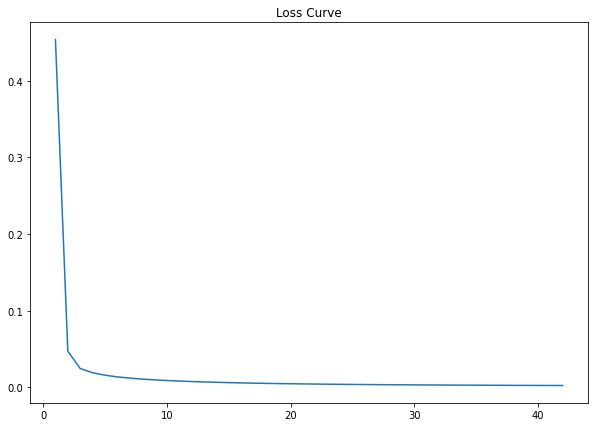

In [101]:
plt.figure(figsize=(10, 7))
y=model.loss_curve_
x=np.arange(1, len(y)+1)
plt.plot(x, y)
plt.title("Loss Curve")
plt.show()

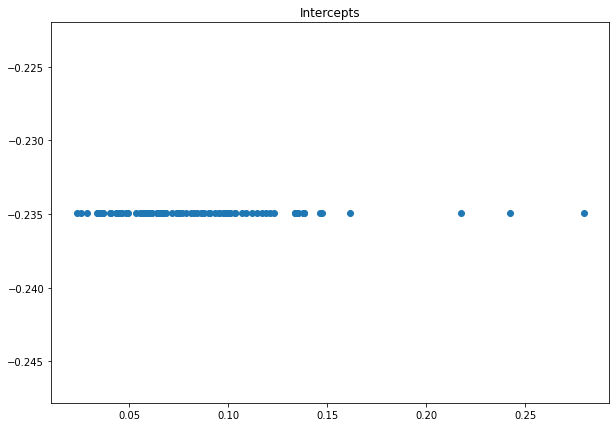

In [128]:
plt.figure(figsize=(10, 7))
x=model.intercepts_[0]
y=np.repeat(model.intercepts_[1], len(x))
plt.scatter(x, y)
plt.title("Intercepts")
plt.show()

TypeError: Invalid shape (23879,) for image data

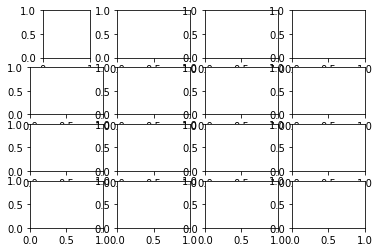

In [114]:
# Save the plot to a file
from neuralplot import ModelPlot

# Visualize the network chart of MLP classifier
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef, cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# End

In [ ]:
vectorizer2.fit(sorted_spam_words)
vector=vectorizer2.transform(lem_mails)
vector.toarray()